<a href="https://colab.research.google.com/github/GabrielVideira/PythonDataScience/blob/main/TC_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tech Challenge**

Tech Challenge é o projeto que englobará os conhecimentos obtidos em todas as disciplinas da fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo.

Importante atentar-se ao prazo de entrega, pois trata-se de uma atividade obrigatória, uma vez que sua pontuação se refere a 90% da nota final.


Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo. Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.


O Head de Dados pediu para que você construísse uma tabela contendo
as seguintes informações:

1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser
encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

Seu objetivo é dizer o montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações.

Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



***Dica: para construir uma boa análise, utilize várias bases do mesmo site!
Outro ponto interessante, é utilizar os dados externos citados acima para
enriquecer ainda mais a mensagem que você quer passar.***

### **Conhecendo e tratando os Dados**

**Dados da Vitinicultura**

A <b>Embrapa Uva e Vinho</b> apresenta em seu site(http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01) iformações referentes à quantidade de uvas processadas, produção e comercialização de vinhos, suco e derivados provenientes do Estado do Rio Grande do Sul, que representa mais de 90% da produção nacional. Apresentam também os dados de importações e portações dos produtos da vitivinicultura.

Alguns esclarecimentos se fazem necessários, para que os usuários façam o uso correto das informações:

* Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).

* Os vinhos importados, denominados de vinhos de mesa são equivalentes aos * vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.

* Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.

* Os arquivos de download possuem a extensão CSV, para facilitar a importação em planilhas ou banco de dados.

In [ ]:
# Bibliotecas usadas
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df_prod = pd.read_csv("/content/Producao.csv", encoding='utf-8', sep=';')
df_prod = df_prod.drop(columns=['id', 'control'])
df_prod.produto = df_prod.produto.str.title()
df_prod = df_prod.set_index('produto')
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram produzidos 217.208.604 litros.

In [ ]:
df_comercio = pd.read_csv("/content/Comercio.csv", encoding='utf-8', sep=';')
df_comercio = df_comercio.drop(columns=['id', 'control'])
df_comercio.Produto = df_comercio.Produto.str.title()
df_comercio = df_comercio.set_index('Produto')
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram comercializados 98.327.606 litros.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_prod.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
produto,,,,,,,,,,,,,,,,,,,,,
Vinho De Mesa,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,211252982,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,154736439,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,7146395,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,49370148,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
Vinho Fino De Mesa (Vinifera),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,46129710,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [ ]:
df_prod.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,...,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,10053727.45,7585407.25,7210039.88,6172418.59,10722525.61,10606233.02,7921217.25,10221200.20,10918132.51,11480530.90,...,14677186.47,17360851.53,7864719.37,19052227.02,16382465.22,15801539.53,12490674.16,19111323.53,17523675.04,17952661.57
std,38808961.58,27449669.38,26280823.84,20892288.87,34808449.02,33176881.52,26426390.91,35088826.02,36545146.66,37363076.84,...,37982768.38,43530934.32,19403148.50,50842599.71,43798130.95,38338729.81,29146188.05,45710748.97,43520443.24,44266361.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2700.00,922.00,0.00,3000.00,2000.00,32519.00,46000.00,30000.00,5000.00,17200.00
75%,895660.00,865800.00,1182465.00,378400.00,279810.00,123500.00,246750.00,268750.00,158575.00,27000.00,...,1504279.00,1536993.00,1033047.50,1759016.00,1533595.00,1757118.50,2747322.00,3824399.50,3138015.50,3974682.00
max,217208604.00,154264651.00,146953297.00,116710345.00,193875345.00,177401209.00,144565438.00,195359778.00,200053669.00,211252982.00,...,196173123.00,210308560.00,86319015.00,255015187.00,218375636.00,144629737.00,124200414.00,173899995.00,195031611.00,174716647.00


In [ ]:
df_comercio.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Produto,,,,,,,,,,,,,,,,,,,,,
Vinho De Mesa,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,...,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,...,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,...,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,...,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
Vinho Fino De Mesa,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,...,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
df_comercio.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,...,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,4285389.69,4852291.68,5172138.81,5313005.58,4481220.48,5016925.63,6458908.94,6498990.21,6619527.85,7124848.24,...,11084658.15,11489827.16,9416294.85,9850568.58,10461880.74,13447368.79,14400380.56,14773220.19,14390021.53,14578660.32
std,16359754.09,19099153.93,19691291.58,19310934.04,15530421.21,17932187.64,22981715.98,23129220.19,23260127.88,24302577.35,...,36058896.55,37614328.08,30157122.12,32198775.72,34194519.73,38323443.64,42045619.34,41593781.74,39205023.74,40386573.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,20.50,2856.75,1953.25,2379.75,4161.75,2377.50
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,80673.00,119040.50,66048.50,55967.00,121457.00,338717.50,198860.50,328257.50,294542.00,378391.00
75%,1220419.75,1219804.50,1819606.50,2034499.75,1845616.50,2186431.75,3285852.50,3494149.50,3399996.75,3342688.25,...,3906140.25,3343750.00,2935857.50,2694804.50,3332817.50,5321690.00,5815971.25,5620649.50,5221489.25,4773561.00
max,98327606.00,114399031.00,118377367.00,116617910.00,94173324.00,108031792.00,139238614.00,140813114.00,141293379.00,149609112.00,...,206404427.00,209198468.00,166769622.00,176059959.00,177186273.00,180446489.00,215557931.00,210012238.00,187939996.00,187016848.00


### **Analisando quantidade de litros produzidos x comercializados**

In [ ]:
df_prod_sum = df_prod.sum()

Text(0, 0.5, 'Litros')

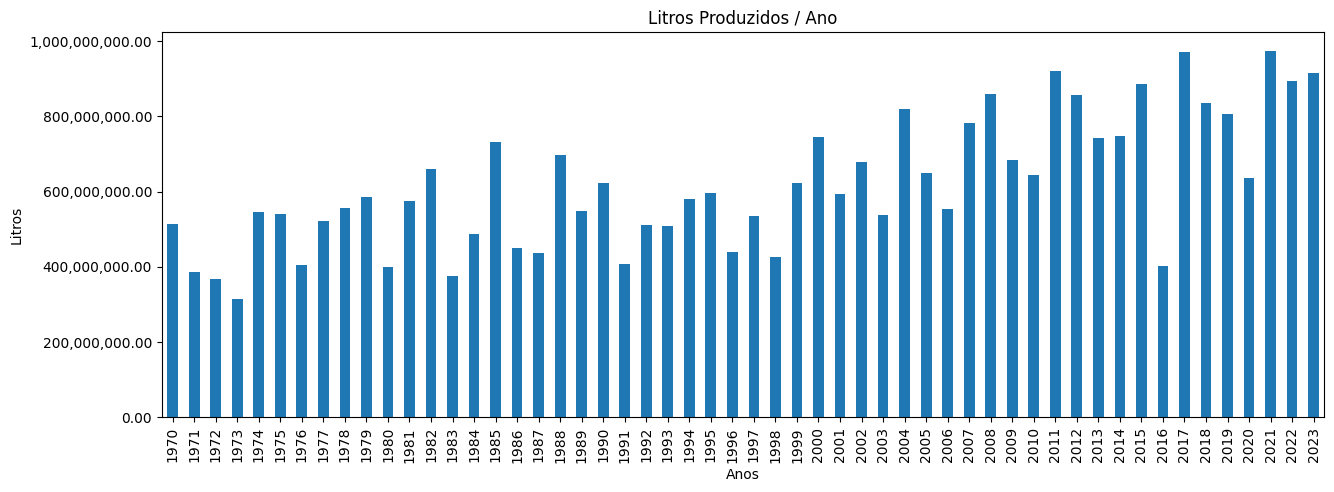

In [ ]:
axis = df_prod_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Produzidos / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

In [ ]:
df_comercio_sum = df_comercio.sum()

Text(0, 0.5, 'Litros')

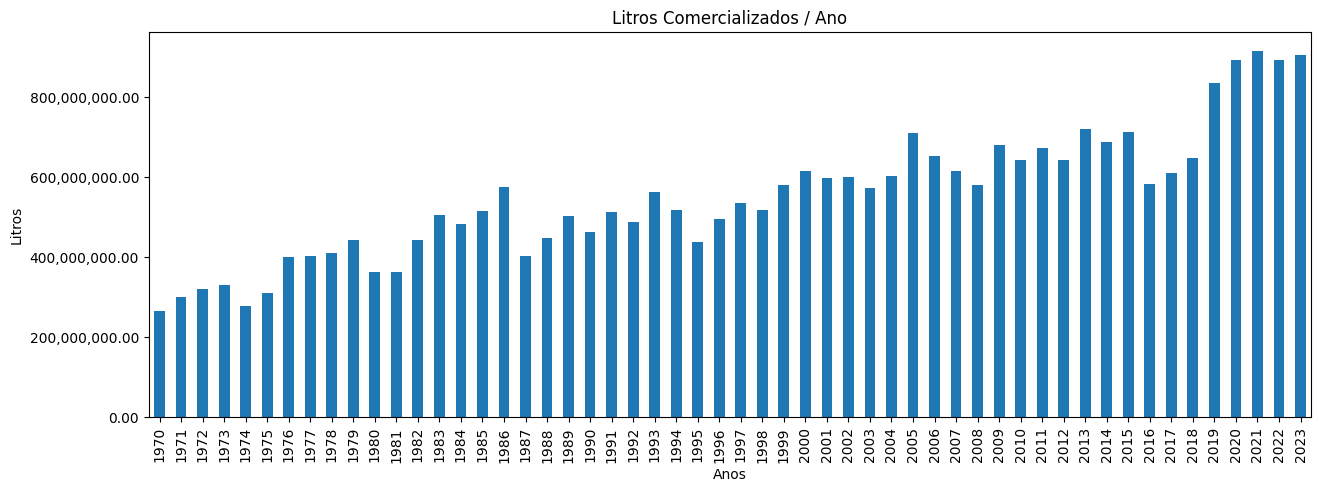

In [ ]:
axis = df_comercio_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

### **Analisando os tipos de Uva/Vinhos**

In [192]:
df_prod['Total'] = df_prod.sum(axis=1)
df_prod_sorted = df_prod.sort_values(by='Total', ascending=False)
df_prod_sorted.Total.head()
# Top 5 produtos mais vendidos relacionados a vinhos

,Total
produto,
Vinho De Mesa,136670261546
Tinto,104236788110
Derivados,32825171834
Vinho Fino De Mesa (Vinifera),29943148937
Mosto Simples,28916939831


In [193]:
df_prod_sorted = df_prod_sorted.drop(columns=['Total'])
df_prod_sorted_head = df_prod_sorted.head(5)
df_prod_sorted_t = df_prod_sorted_head.T

Text(0, 0.5, 'Litros')

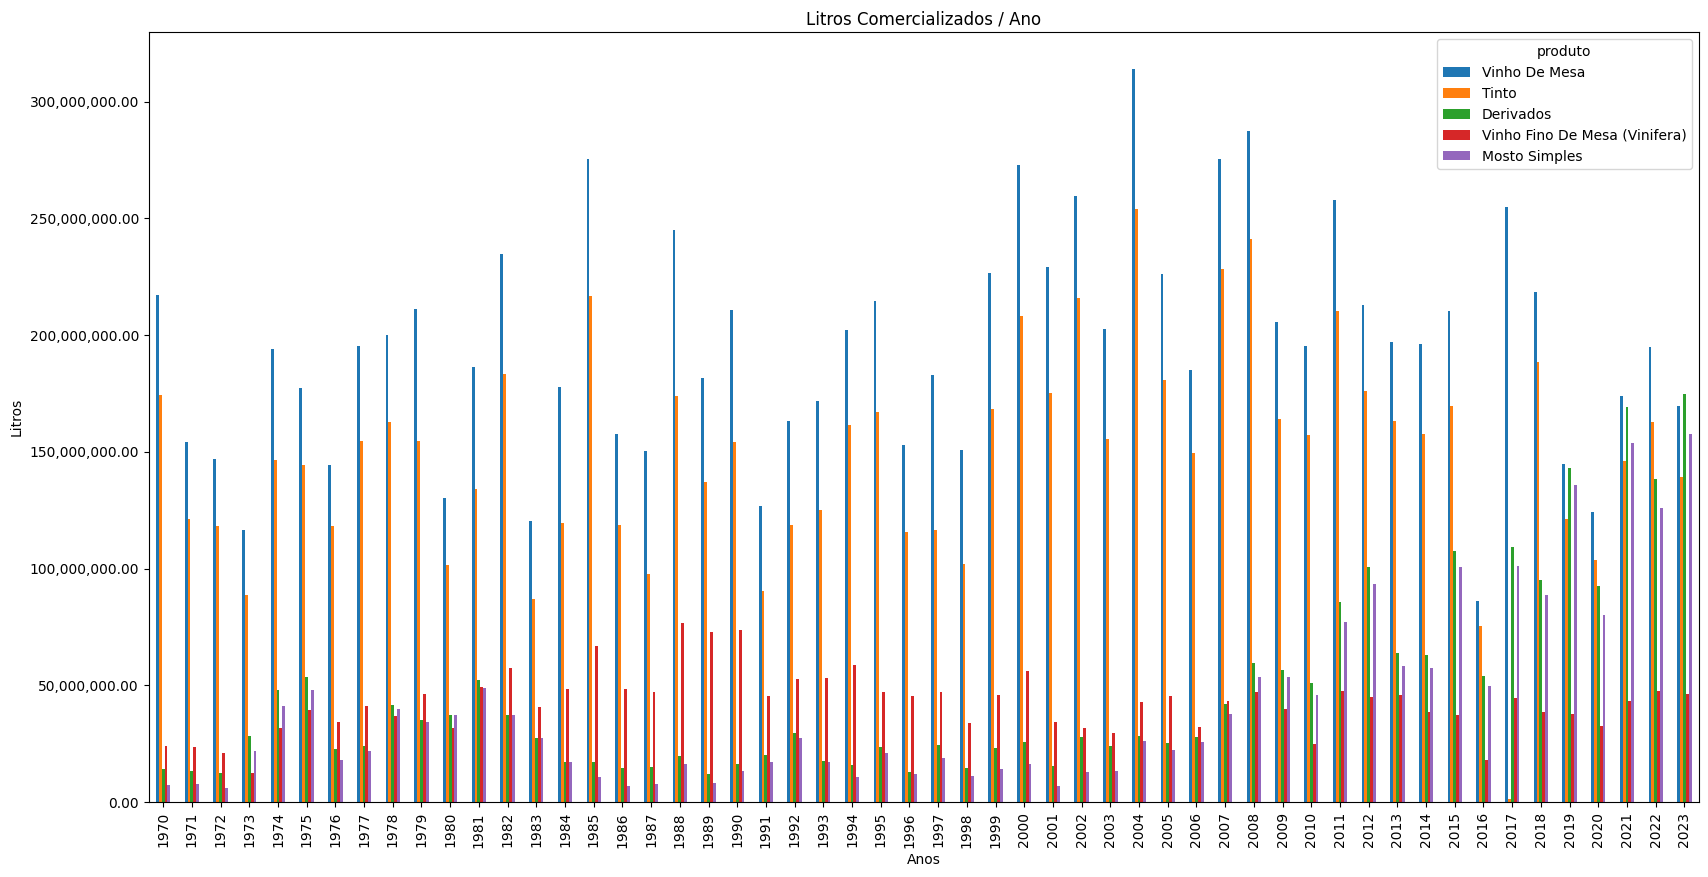

In [194]:
axis = df_prod_sorted_t.plot(kind='bar', figsize=(20,10))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')